#ENTREGA 1:

Objetivos Generales:
Entender el problema de negocio e identificar los elementos a ser considerados para el planteamiento de un Modelo de Data Science.
Describir los datos de negocio y las relaciones entre datos mediante el Análisis Exploratorio de Datos.

##Paquetes y funciones que utilizaremos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings("ignore")

import ipywidgets as widgets #librearia para interaccion del usuario con los graficos
import missingno as msno

from scipy.stats import norm
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

from prettytable import PrettyTable

In [ ]:
#Función para pasar a minúsculas los string de una lista o array
def to_lowercase(arr):
 new_arr = []
 for x in list(range(0,len(arr))):
   new = arr[x].lower()
   new_arr.append(new)
 return new_arr

In [ ]:
#Con PrettyTable, genero una función que realiza una tabla resumen de los campos del dataset:

def df_explore(df):

    print( 'Shape: ', df.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])
    
    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

In [ ]:
#Funcion para extraer el primer digito de una lista o array

def getFirstDigit(num):
    while num >= 10:
        num = int(num/10)
    return num


In [ ]:
#Determinar cuántas columnas y rows queremos que nos muestre por defecto
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

##Importar datos

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/johanjohnson/DataCleaning---ChurnDataSet/main/churn_raw_data.csv")
df=pd.DataFrame(data)
df.head(2)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4


In [ ]:
#Borramos la primer columna porque son índices
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3


In [ ]:
col_names = to_lowercase(df.columns.values)

df.set_axis(col_names,axis='columns',inplace=True)

df.columns.values

array(['caseorder', 'customer_id', 'interaction', 'city', 'state',
       'county', 'zip', 'lat', 'lng', 'population', 'area', 'timezone',
       'job', 'children', 'age', 'education', 'employment', 'income',
       'marital', 'gender', 'churn', 'outage_sec_perweek', 'email',
       'contacts', 'yearly_equip_failure', 'techie', 'contract',
       'port_modem', 'tablet', 'internetservice', 'phone', 'multiple',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies',
       'paperlessbilling', 'paymentmethod', 'tenure', 'monthlycharge',
       'bandwidth_gb_year', 'item1', 'item2', 'item3', 'item4', 'item5',
       'item6', 'item7', 'item8'], dtype=object)

In [ ]:
original = df

##Enriquecimiento de dataset

Creamos nuevas variables que consideramos podrían enriquecer los datos e incluimos vriables categóricas de data type object para variables numéricas categóricas.

In [ ]:
# Crear una variable booleana de churn con 0 y 1 para poder compararla contra variables numéricas

df['churn_bool']=df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['churn_bool']

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: churn_bool, Length: 10000, dtype: int64

In [ ]:
#Variable que unifique los valores obtenidos en la encuesta

df['total_encuesta']=df.item1.values+df.item2.values+df.item3.values+df.item4.values+df.item5.values+df.item6.values+df.item7.values+df.item8.values
df['total_encuesta']

0       33
1       28
2       27
3       29
4       32
        ..
9995    23
9996    34
9997    33
9998    33
9999    21
Name: total_encuesta, Length: 10000, dtype: int64

In [ ]:
#Cambiar los nombres de las últimas columnas reemplazar itemx por el nombre del item:

factores_items = {'item1': 'timely_response', 
                  'item2': 'timely_fixes', 
                  'item3': 'timely_replacements', 
                  'item4': 'reliability', 
                  'item5': 'options',
                  'item6': 'respectful_response',
                  'item7': 'courteous_exchange',
                  'item8': 'active_listening'}

df.rename(columns=factores_items, inplace=True)

df.head(2)

,caseorder,customer_id,interaction,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,churn_bool,total_encuesta
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,0,33
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,1,28


In [ ]:
#Nuevas variables que cuentan la cantidad de cada tipo de servicios y el total de servicios que los clientes contratan

df['q_online_serv'] = df.internetservice.apply(lambda x: 1 if x in ['Fiber Optic', 'DSL'] else 0).values + df.onlinesecurity.apply(lambda x: 1 if x == 'Yes' else 0).values + df.onlinebackup.apply(lambda x: 1 if x == 'Yes' else 0).values+df.techsupport.apply(lambda x: 1 if x== 'Yes' else 0).values
df['q_phone_serv']=df.phone.apply(lambda x: 1 if x == 'Yes' else 0).values+df.deviceprotection.apply(lambda x: 1 if x == 'Yes' else 0).values
df['q_streaming'] = df.streamingtv.apply(lambda x:1 if x=='Yes' else 0).values + df.streamingmovies.apply(lambda x:1 if x=='Yes'else 0).values

df['q_total_serv']=df['q_online_serv'].values+df['q_phone_serv'].values+df['q_streaming'].values




df[['q_online_serv','q_phone_serv','q_total_serv', 'q_streaming']]

,q_online_serv,q_phone_serv,q_total_serv,q_streaming
0,3,1,5,1
1,2,1,5,2
2,1,1,3,1
3,2,1,4,1
4,2,0,3,1
...,...,...,...,...
9995,2,1,3,0
9996,3,1,5,1
9997,3,1,4,0
9998,2,0,4,2


In [ ]:
#Creacion de variable zip_zone agrupando los zip teniendo en cuenta su primer digito quen indica una de las 9 zonas generales de EEUU


df['zip_zone'] = df.zip.apply(lambda x: getFirstDigit(x))
df.groupby('zip_zone').count()

,caseorder,customer_id,interaction,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,churn_bool,total_encuesta,q_online_serv,q_phone_serv,q_streaming,q_total_serv
zip_zone,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,908,916,1216,1216,911,1216,1216,1216,1216,1216,1216,1216,922,1216,1216,1216,1216,1067,1216,1216,1216,1216,1108,1216,1216,1216,1216,1082,1216,1100,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216
2,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,903,897,1177,1177,903,1177,1177,1177,1177,1177,1177,1177,901,1177,1177,1177,1177,1057,1177,1177,1177,1177,1054,1177,1177,1177,1177,1081,1177,1064,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177
3,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,868,878,1140,1140,853,1140,1140,1140,1140,1140,1140,1140,852,1140,1140,1140,1140,1016,1140,1140,1140,1140,1043,1140,1140,1140,1140,1039,1140,1023,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140
4,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,926,925,1228,1228,899,1228,1228,1228,1228,1228,1228,1228,941,1228,1228,1228,1228,1117,1228,1228,1228,1228,1112,1228,1228,1228,1228,1102,1228,1101,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228
5,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,877,885,1170,1170,875,1170,1170,1170,1170,1170,1170,1170,867,1170,1170,1170,1170,1046,1170,1170,1170,1170,1058,1170,1170,1170,1170,1061,1170,1058,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170
6,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,849,862,1183,1183,904,1183,1183,1183,1183,1183,1183,1183,872,1183,1183,1183,1183,1066,1183,1183,1183,1183,1059,1183,1183,1183,1183,1099,1183,1064,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183
7,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,948,898,1236,1236,933,1236,1236,1236,1236,1236,1236,1236,934,1236,1236,1236,1236,1104,1236,1236,1236,1236,1097,1236,1236,1236,1236,1116,1236,1109,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236
8,710,710,710,710,710,710,710,710,710,710,710,710,710,537,528,710,710,521,710,710,710,710,710,710,710,523,710,710,710,710,645,710,710,710,710,627,710,710,710,710,637,710,629,710,710,710,710,710,710,710,710,710,710,710,710,710,710
9,940,940,940,940,940,940,940,940,940,940,940,940,940,689,736,940,940,711,940,940,940,940,940,940,940,711,940,940,940,940,856,940,940,940,940,851,940,940,940,940,852,940,831,940,940,940,940,940,940,940,940,940,940,940,940,940,940


In [ ]:
#Agregar variables string que se correspondan con las numéricas categóricas para el análisis de variables categóricas
df['children_cat'] = df['children'].apply(lambda x: str(x))
df['age_cat'] = df['age'].apply(lambda x: str(x))
df['zip_cat'] = df['zip'].apply(lambda x: str(x))
df['zip_cat'] = df['zip'].apply(lambda x: str(x))
df['pop_cat'] = df['population'].apply(lambda x: str(x))
df['email_cat'] = df['zip'].apply(lambda x: str(x))
df['contacts_cat'] = df['contacts'].apply(lambda x: str(x))
df['failure_cat'] = df['yearly_equip_failure'].apply(lambda x: str(x))
df['timely_response_cat'] = df['timely_response'].apply(lambda x: str(x))
df['timely_fixes_cat'] = df['timely_fixes'].apply(lambda x: str(x))
df['timely_replacements_cat'] = df['timely_replacements'].apply(lambda x: str(x))
df['reliability_cat'] = df['reliability'].apply(lambda x: str(x))
df['options_cat'] = df['options'].apply(lambda x: str(x))
df['respectful_response_cat'] = df['respectful_response'].apply(lambda x: str(x))
df['courteous_exchange_cat'] = df['courteous_exchange'].apply(lambda x: str(x))
df['active_listening_cat'] = df['active_listening'].apply(lambda x: str(x))
df['total_encuesta_cat'] = df['total_encuesta'].apply(lambda x: str(x))
df['total_encuesta_bins'] = pd.cut(df['total_encuesta'].astype('int64'),10)

df['q_online_serv_cat'] = df['q_online_serv'].apply(lambda x: str(x))
df['q_phone_serv_cat'] = df['q_phone_serv'].apply(lambda x: str(x))
df['q_total_serv_cat'] = df['q_total_serv'].apply(lambda x: str(x))
df['q_streaming_cat'] = df.q_streaming.apply(lambda x: str(x))
df['zip_zone_cat']= df.zip_zone.apply(lambda x: str(x))

cols_arr = df.columns.values
cols_arr = cols_arr.astype('str')

#validar que se agregaron correctamentes las variables

df[cols_arr[np.char.endswith(cols_arr, '_cat')]].head(2)

,children_cat,age_cat,zip_cat,pop_cat,email_cat,contacts_cat,failure_cat,timely_response_cat,timely_fixes_cat,timely_replacements_cat,reliability_cat,options_cat,respectful_response_cat,courteous_exchange_cat,active_listening_cat,total_encuesta_cat,q_online_serv_cat,q_phone_serv_cat,q_total_serv_cat,q_streaming_cat,zip_zone_cat
0,nan,68.0,99927,38,99927,0,1,5,5,5,3,4,4,3,4,33,3,1,5,1,9
1,1.0,27.0,48661,10446,48661,0,1,3,4,3,3,4,3,4,4,28,2,1,5,2,4


##Análisis de datos

### 1. Estructura de los datos

In [ ]:
# verificación de forma del conjunto de datos originales y enriquecido
print(f'La cantidad de columnas del dataset original son {original.shape[1]} y {original.shape[0]} filas')
print(f'La cantidad de columnas del dataset enriquecido son {df.shape[1]} y {df.shape[0]} filas')

La cantidad de columnas del dataset original son 80 y 10000 filas
La cantidad de columnas del dataset enriquecido son 80 y 10000 filas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   caseorder                10000 non-null  int64   
 1   customer_id              10000 non-null  object  
 2   interaction              10000 non-null  object  
 3   city                     10000 non-null  object  
 4   state                    10000 non-null  object  
 5   county                   10000 non-null  object  
 6   zip                      10000 non-null  int64   
 7   lat                      10000 non-null  float64 
 8   lng                      10000 non-null  float64 
 9   population               10000 non-null  int64   
 10  area                     10000 non-null  object  
 11  timezone                 10000 non-null  object  
 12  job                      10000 non-null  object  
 13  children                 7505 non-null   float64 
 14  age    

In [ ]:
#Tabla resumen con información relevante de cada variable y su estructura
df_explore(df)

Shape:  (10000, 80)
+-------------------------+----------+----------+-------+--------+--------------------------------------+
|          Column         |   Type   | Non-Null | Nulls | Unique |               Example                |
+-------------------------+----------+----------+-------+--------+--------------------------------------+
|        caseorder        |  int64   |  10000   |   0   | 10000  |                  1                   |
|       customer_id       |  object  |  10000   |   0   | 10000  |               K409198                |
|       interaction       |  object  |  10000   |   0   | 10000  | aa90260b-4141-4a24-8e36-b04ce1f4f77b |
|           city          |  object  |  10000   |   0   |  6058  |             Point Baker              |
|          state          |  object  |  10000   |   0   |   52   |                  AK                  |
|          county         |  object  |  10000   |   0   |  1620  |        Prince of Wales-Hyder         |
|           zip           

####**Observaciones**

Algunas variables tienen valores nulos.

Hay 9 datos de tipo float64: children y age deben convertirse a int, ya que estos datos corresponden a números enteros, son variables numéricas categóricas. Pero al tener nulos no podemos convertirlas en int64

Hay 20 datos int64.

Hay un total de 48 variables objeto. Las variables churn, techie, port_modem, tablet, phone, multiple, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies y paperlessbilling, toman valores 'Yes' y 'No', por lo que son booleanas.

Vemos que algunas categóricas tienen muchos valores únicos.

### Valores duplicados y nulos

In [ ]:
# Duplicados: No hay duplicados

#Determinar si hay duplicados en la tabla
print(f'El data set tiene {df.duplicated().sum()} rows duplicadas')

#Dterminar si hay duplicados en los ID de clientes
print(f'La columna customer_id tiene {df.customer_id.duplicated().sum()} datos duplicados')

El data set tiene 0 rows duplicadas
La columna customer_id tiene 0 datos duplicados


In [ ]:
#Determinar si hay nulos
q_nulos=df.isnull().sum()[df.isnull().sum()>0]
porc_nulos = df.isnull().sum()[df.isnull().sum()>0]/df.shape[0]*100

tabla_nulos = pd.DataFrame([q_nulos,porc_nulos],index=['q_nulos','porc_nulos']).T
tabla_nulos.sort_values('porc_nulos',ascending=False)

,q_nulos,porc_nulos
children,2495.0,24.95
income,2490.0,24.90
techie,2477.0,24.77
age,2475.0,24.75
phone,1026.0,10.26
bandwidth_gb_year,1021.0,10.21
techsupport,991.0,9.91
tenure,931.0,9.31


In [ ]:
# Los valores null de la variable children corresponden a personas sin hijos? --> hipótesis: si no existe el valor 0 los nulls representan el 0

print(f'Los valores nulos de la variable children parecen ser datos faltantes, ya que los valores que no son nulos van de 0 (no tienen niños) a 10')
print(f'El menor valor de la variable children es {min(df.children.unique()[1:len(df.children.unique())])}')

Los valores nulos de la variable children parecen ser datos faltantes, ya que los valores que no son nulos van de 0 (no tienen niños) a 10
El menor valor de la variable children es 0.0


In [ ]:
# Los valores null de la variable tenure corresponden a clientes nuevos? --> hipótesis: si no existe el valor 0 los nulls representan el 0, siendo estos clientes que aún no han cumplido un mes de antiguedad

print(f'Los valores nulos de la variable tenure parecen ser clientes de menos de un mes de antiguedad, ya que el valor mínimo de la variable es 1')
print(f'El menor valor de la variable tenure es {min(df.tenure.unique())}')

Los valores nulos de la variable tenure parecen ser clientes de menos de un mes de antiguedad, ya que el valor mínimo de la variable es 1
El menor valor de la variable tenure es 1.00025934


In [ ]:
# Hipótesis: Quienes tienen null en bandwidth_gb_year, no contratan servicio de internet.

if df[['internetservice','bandwidth_gb_year']][df.bandwidth_gb_year.isnull()][df.internetservice!='None'].shape[0] > 0:
  print('La variable bandwidth_gb_year tiene valores nulos para algunos servicios de internet')

La variable bandwidth_gb_year tiene valores nulos para algunos servicios de internet


In [ ]:
# Hipótesis: La gente que tiene Multiple siempre tiene servicio de teléfono, por lo que los nulos de personas que tengan Yes en multiple puede cambiarse por Yes en phone

#Corroborar si hay gente que no tiene servicio de teléfono y si tiene multiple. Si esto es así no puede reemplazarse phone por 'Yes' en esos casos
df[((df.phone=='No')==True) & ((df.multiple=='Yes')==True)]

,caseorder,customer_id,interaction,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,churn_bool,total_encuesta,q_online_serv,q_phone_serv,q_streaming,q_total_serv,zip_zone,children_cat,age_cat,zip_cat,pop_cat,email_cat,contacts_cat,failure_cat,timely_response_cat,timely_fixes_cat,timely_replacements_cat,reliability_cat,options_cat,respectful_response_cat,courteous_exchange_cat,active_listening_cat,total_encuesta_cat,total_encuesta_bins,q_online_serv_cat,q_phone_serv_cat,q_total_serv_cat,q_streaming_cat,zip_zone_cat
14,15,H68068,8dc7ad15-2f59-4c77-9640-6f2c0000b3fc,Hillside,IL,Cook,60162,41.86752,-87.90222,8165,Urban,America/Chicago,Automotive engineer,NaN,30.0,Associate's Degree,Full Time,64256.81,Separated,Male,Yes,12.630691,10,3,0,No,Month-to-month,No,No,DSL,No,Yes,No,Yes,No,Yes,No,No,Yes,Bank Transfer(automatic),10.060199,160.805542,NaN,3,3,4,2,3,4,4,2,1,25,3,0,0,3,6,nan,30.0,60162,8165,60162,3,0,3,3,4,2,3,4,4,2,25,"(22.6, 25.8]",3,0,3,0,6
104,105,L475907,50d17517-42e8-41ee-b3e1-51380935f604,Pleasant Hill,MO,Cass,64080,38.76701,-94.25448,13000,Suburban,America/Chicago,Wellsite geologist,NaN,NaN,Bachelor's Degree,Full Time,3805.84,Divorced,Male,Yes,15.661592,16,0,2,NaN,Month-to-month,Yes,No,Fiber Optic,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Mailed Check,22.792142,205.763954,2294.781131,3,3,3,3,2,4,4,4,1,26,2,1,1,4,6,nan,nan,64080,13000,64080,0,2,3,3,3,3,2,4,4,4,26,"(25.8, 29.0]",2,1,4,1,6
108,109,O235183,31f4132d-f26a-4fe0-af22-3a01989b7258,Nolan,TX,Nolan,79537,32.29188,-100.21075,30,Suburban,America/Chicago,"Sales professional, IT",0.0,42.0,Regular High School Diploma,Full Time,30649.31,Married,Male,Yes,13.734173,9,2,2,No,Month-to-month,Yes,No,DSL,No,Yes,No,No,No,Yes,No,Yes,No,Bank Transfer(automatic),14.764688,173.540759,1963.332683,4,3,4,3,5,4,2,3,1,28,2,0,1,3,7,0.0,42.0,79537,30,79537,2,2,4,3,4,3,5,4,2,3,28,"(25.8, 29.0]",2,0,3,1,7
127,128,U700981,785924d4-3532-4681-9cf7-40fb062d97d8,Vernon Rockville,CT,Tolland,6066,41.83640,-72.46061,29210,Urban,America/New_York,"Engineer, biomedical",0.0,NaN,Bachelor's Degree,Full Time,34281.10,Never Married,Male,No,12.241421,9,0,0,NaN,Two Year,No,No,DSL,No,Yes,No,Yes,Yes,Yes,No,No,No,Bank Transfer(automatic),10.053063,172.973125,1531.155367,5,5,4,2,5,3,4,3,0,31,3,1,0,4,6,0.0,nan,6066,29210,6066,0,0,5,5,4,2,5,3,4,3,31,"(29.0, 32.2]",3,1,4,0,6
138,139,D873414,0a8c923f-2788-4bf2-935d-ccab258e0306,Thomas,OK,Custer,73669,35.72895,-98.74040,1750,Suburban,America/Chicago,Risk manager,4.0,75.0,Regular High School Diploma,Full Time,74638.78,Never Married,Female,Yes,6.430566,10,3,1,No,One year,No,No,Fiber Optic,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Mailed Check,14.640116,255.038382,NaN,3,3,4,4,3,4,2,5,1,28,2,1,2,5,7,4.0,75.0,73669,1750,73669,3,1,3,3,4,4,3,4,2,5,28,"(25.8, 29.0]",2,1,5,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9869,9870,R98590,54291f43-0273-4c56-b210-ea44837ca7de,Grayland,WA,Grays Harbor,98547,46.78634,-124.01990,1265,Rural,America/Los_Angeles,Oncologist,NaN,26.0,"Some College, Less than 1 Year",Full Time,42585.62,Separated,Female,No,7.254150,10,0,0,No,Month-to-month,Yes,Yes,None,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Electronic Check,NaN,165.549500,4110.601000,2,2,1,4,3,2,4,4,0,22,2,1,1,4,9,nan,26.0,98547,1265,98547,0,0,2,2,1,4,3,2,4,4,22,"(19.4, 22.6]"

In [ ]:
#Hay algún cliente que tenga todas estas categorias nulas?

df[df.children.isnull() & df.income.isnull() & df.techie.isnull() & df.phone.isnull() & df.techsupport.isnull() & df.tenure.isnull() & df.bandwidth_gb_year.isnull()].index

Int64Index([], dtype='int64')

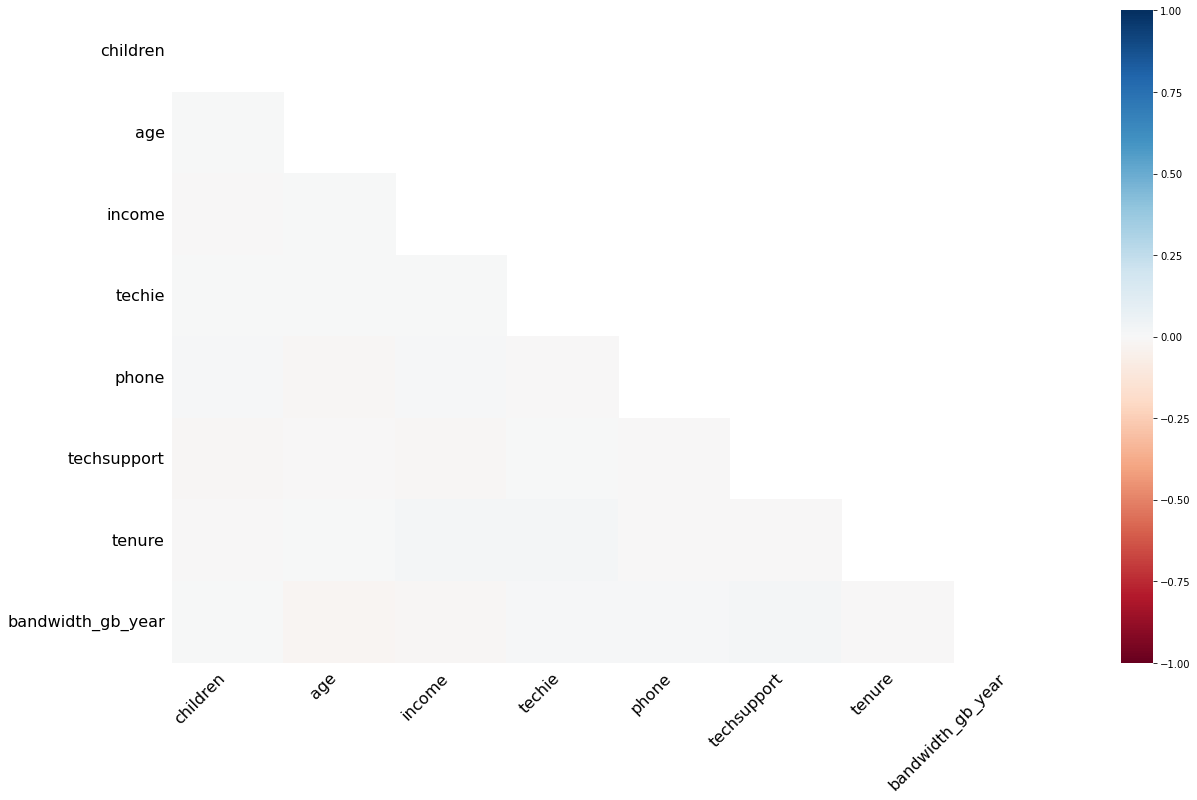

In [ ]:
msno.heatmap(df)

#### **Observaciones** 

Hay 8 columnas con datos nulos. 

Children, income, techie y age tienen aprox 25% de los datos nulos. Las excluimos del análisis? Deberíamos determinar esto más adelante en el análisis bivariado y multivariado.

En principio, los datos nulos de tenure podría analizarse de cambiarlos por 0.

No se observa un patrón definido de clientes que tengan todos los datos nulos, estan dispersos. Ningún cliente tiene las 8 columnas con datos nulos al mismo tiempo. Hay 333 clientes que tienen más de 4 o más columnas nulas

### Análisis Univariado

####Funciones

In [ ]:
#Función para ver la distribuciones de las variables categóricas y determinar si es necesario transformarlas (utiliza por defecto log, si no se puede por log habrá que ver otra forma)
def num_variables(column):

  tabla = df
  print('OBSERVACIONES')

  if tabla[column].isnull().sum()==0:
    original = tabla[column]

  else:
    original = tabla[column][tabla[column].isnull()==False]
    print(f'La variable posee valores nulos, por lo que estos se han eliminado para realizar los gráficos')

  if min(original)<=0:
    log_data = original
    print(f'La variable no puede transformarse por medio de logaritmo ya que tiene valores menores o iguales a cero. Valor minimo {min(original)}')
  
  else:
    log_data = np.log10(original)
 
  print(f'\n El sesgo de la distribución original de {column} es {round(original.skew(),4)}, mientras el sesgo de la variable transformada con log10 es {round(log_data.skew(),4)}\n')
  print(f'\n La curtosis de la distribución original de {column} es {round(original.kurtosis(),4)}, mientras la curtosis de la variable transformada con log10 es {round(log_data.kurtosis(),4)}\n')
  
  fig, ax = plt.subplots(3,2,figsize=(15,15))

  sns.histplot(data = tabla, x=original, ax=ax[0,0], kde=True);
  sns.histplot(data = tabla, x=log_data, ax=ax[0,1], kde=True);
  sns.boxplot(x = original, ax=ax[1,0], color='#e74c3c');
  sns.boxplot(x = log_data, ax=ax[1,1], color='#e74c3c');
  qqplot(original, line='s',ax=ax[2,0]);
  qqplot(log_data, line='s',ax=ax[2,1]);


  ax[0,0].set_title('distribución métrica original')
  #ax[0].text(x=3.3,y=39,s='Skewness: %f' %log_data.skew()) ver esto dsp

  ax[0,1].set_title('log distribución')
  #ax[1].text(x=3.3,y=39,s='Skewness: %f' %log_data.skew()) ver esto dsp

  ax[1,0].set_title('box plot métrica original')
  ax[1,1].set_title('box plot métrica log')
  ax[2,0].set_title('qq plot métrica original')
  ax[2,1].set_title('log qq plot métrica original')


  return 

In [ ]:
#Función para gráficos de variables categóricas

def plotFrequency(cat_columns):
    '''Graficos de variables categoricas '''
    print()
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(data = df, x= cat_columns,order = df[cat_columns].value_counts().index, palette='plasma',ax=ax).set(title=f'Frecuencia de la variable {cat_columns}')

    abs_values = df[cat_columns].value_counts(ascending=False).values
    rel_values = df[cat_columns].value_counts(ascending=False, normalize=True).values * 100

    for pos,abs,rel in zip(ax.patches,abs_values,rel_values):
     label= "{}({}%)".format(abs,round(rel,2))
     plt.text(x=pos.get_x(),y=pos.get_height(),s=label)

    return

#### Variables Numéricas

In [ ]:
#describe no categóricas (hay algunas de las que son int64, pero por las caracteristícas tmb nos pueden dar info con el análisis de los estadísticos para las no categóricas)

no_cat_col = [x for x in df.select_dtypes(include='number') if x not in ['caseorder']]

df[no_cat_col].describe()

,zip,lat,lng,population,children,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,churn_bool,total_encuesta,q_online_serv,q_phone_serv,q_streaming,q_total_serv,zip_zone
count,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600,0.265000,27.975700,1.932700,1.25140,0.981900,4.166000,4.764200
std,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633,0.441355,4.334165,0.937688,0.62517,0.703294,1.329369,2.506876
min,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,13.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,25.000000,1.000000,1.00000,0.000000,3.000000,3.000000
50%,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,0.000000,28.000000,2.000000,1.00000,1.000000,4.000000,5.000000
75%,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,31.000000,3.000000,2.00000,1.000000,5.000000,7.000000
max,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000,1.000000,45.000000,4.000000,2.00000,2.000000,8.000000,9.000000


In [ ]:
dd = widgets.Dropdown(options=no_cat_col,
                      value = 'monthlycharge',
                      description = 'Column Name')

ui = widgets.HBox([dd])

out = widgets.interactive_output(num_variables, {'column': dd})

display(ui, out)

Output()

#####**Observaciones variables numéricas:**

La variable **caseorder** fue excluida del análisis, por tratarse de una variable similar a un índice.

**Zip** es una variable numérica categórica. 

**lat y lng** son variables que nos permitiran ubicar las direcciones de los clientes. Latitud tiene una distribución más próxima a la normal y con menos dispersión que longitud (que tiene un sesgo a la derecha), lo que podría indicar que es un país o zona que tiene mayor territorio horizontalmente que verticalmente. Probablemente todos los clientes sean de US. También presentan muchos outliers.

**Población** Es una variable que indica densidad poblacional ya que se refiere a la cantidad de personas que hay en un radio x a la ubicación del cliente. 
* Esta fuertemente sesgada a la izq. No puede transformarse con log.
* Llama la atención la cantidad de valores próximos a cero, podría ser un error o es gente que esta muy aislada?
* No se pueden realizar operaciones matemáticas como suma, ya que corremos riesgo de duplicar datos porque más de un cliente puede pertenecer a la misma zona,si los clientes viven cerca uno de otros se consideran a las mismas personas varias veces.

**Children**, tiene algunos outliers, personas con muchos hijos (se pueden armar categorias) y **Age** tiene una distribución más bien uniforme, ambas son numéricas categoricas.

**Income** presenta un sesgo a la izquierda, con outliers en valores grandes. Realizando una transformación mediante log podemos ver que la distribución tiene una forma más normal, pero sigue teniendo un sesgo, aunque es menor que la original.

**outage_sec_perweek**, presenta algunos valores extraños:
* Negativos: Estos son errores, ya que los segundos no pueden ser negativos
* No tiene valores entre 20 y 30.
* Hay muchos outliers. pero la gran concentración de datos esta a la derecha, a juzgar por los datos de mediana y media el comportamiento de los datos menores de 20/30 debería ser normal. Podemos observar así que hay clientes que tienen cortes en el servicio que duran más tiempo.

**Emails**: Dist normal, numerica categórica
**Contacts y failure**: Num categórica, existen algunos outliers

**Tenure y bandwith_gb_year**: Asimétrica, tiene dos modas. Dos tipos de clientes, lo que estan hace muchos meses o los que no superan los 25/30 y en bandwith hay dos grupos hasta 3000/3500 gb o mas de 3500/4000

**Monthly charges** es una variable bastante normal. No es necesario transformarla.

Las variables de los **items** son numéricas categóricas. Todos tienen medias similares.

####Variables Categóricas

In [ ]:
#describe para variables categóricas

df.describe(include=['O','category'])

,customer_id,interaction,city,state,county,area,timezone,job,education,employment,marital,gender,churn,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,children_cat,age_cat,zip_cat,pop_cat,email_cat,contacts_cat,failure_cat,timely_response_cat,timely_fixes_cat,timely_replacements_cat,reliability_cat,options_cat,respectful_response_cat,courteous_exchange_cat,active_listening_cat,total_encuesta_cat,total_encuesta_bins,q_online_serv_cat,q_phone_serv_cat,q_total_serv_cat,q_streaming_cat,zip_zone_cat
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,7523,10000,10000,10000,10000,8974,10000,10000,10000,10000,9009,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,6058,52,1620,3,25,639,12,5,5,3,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4,12,73,8583,5933,8583,8,6,7,7,8,7,7,8,7,8,33,10,5,3,9,3,9
top,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Houston,TX,Washington,Suburban,America/New_York,Occupational psychologist,Regular High School Diploma,Full Time,Divorced,Female,No,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes,Electronic Check,nan,nan,32340,0,32340,0,0,3,3,3,4,3,3,4,3,27,"(25.8, 29.0]",2,1,4,1,7
freq,1,1,34,603,111,3346,4072,30,2421,5992,2092,5025,7350,6266,5456,5166,7009,4408,8128,5392,6424,5494,5614,5635,5071,5110,5882,3398,2495,2475,4,97,4,3680,6727,3448,3415,3435,3452,3462,3445,3456,3461,926,3489,4013,5460,2935,5051,1236


In [ ]:
cat_cols = list(df.select_dtypes(include=['O','category']).columns.values)

In [ ]:
all_cat = widgets.Dropdown(options=cat_cols,
                      value = 'churn',
                      description = 'Column Name')

ui = widgets.HBox([all_cat])

out = widgets.interactive_output(plotFrequency, {'cat_columns': all_cat})

display(ui, out)

Output()

##### Obeservaciones variables categóricas:

Variable objetivo: Churn
Hay 26.5% de valores que son churn, es un problema desbalanceado?

Otras categóricas:
1. Hay variables que tienen demasiados valores: customer_id, interaction, city, county, state y timezone. 
2. state: De las variables con metada dato, trabajaria solo sobre state. Sera mejor en un estado que en otro el servicio y por eso se quedan los clientes? 
Ningun estado sobresale sobre el resto. No tendria sentido agrupar. Quiza podria googlear areas del pais, agregar una columna con ese valor y luego agrupar.
3. Job y education tienen muchas categorías pero se podrían reducir al realizar agrupaciones
4. Las categorias de marital tienen freq similares
5. La mayoria de los contratos son month to month (56%)
6. Tiene sentido analizar esta variable? el 60% de los clientes tiene trabajo fulltime. Tendra correlacion con churn?
7. El 50% de los clientes contrata alguno de los dos servicios de streaming que ofrece  la empresa(tv o peliculas)
8. La variable zip_zone nos indica que la empresa tiene menos clientes en la costa oeste que en la coste este de EEUU. Sera mejor el servicio en la costa este?

### Análisis Bivariado

####Funciones

In [ ]:
#Función para gráficos entre variables categóricas y numéricas
def graph_cat_num(var_cat,var_num):
  fig, ax = plt.subplots(1,3,figsize=(30,10))
  p_1=sns.boxplot(data=df,x=var_cat,y=var_num,hue=var_cat,ax=ax[0])
  str_title='Relación entre {} y {}'.format(var_cat,var_num)
  p_1.set_title(str_title,size=20, loc= 'center')
  
  p_2=sns.violinplot(data=df,x=var_cat,y=var_num,hue=var_cat,ax=ax[1])

  p_3=sns.kdeplot(data=df,x=var_num,hue=var_cat,ax=ax[2])
  return

In [ ]:
#Función para gráficos entre 2 variables categóricas
def graph_cat_cat(var_x,var_hue):

  fig, ax = plt.subplots(1,2,figsize=(50,50))

  #Gráfico bar para ver freq de una categórica y agrupación según otra categórica
  ex=sns.countplot(data=df,x=var_x,hue=var_hue,order=df[var_x].value_counts().index,ax=ax[0])
  ex.set_xticklabels(ex.get_xticklabels(),rotation=90);

  #Gráfico stacked-bar con porcentajes para ver la dist de una variable en las categorias
  cross = pd.crosstab(df[var_hue] , df[var_x])
  columnas = cross.columns
  len_index = len(cross.index)
  dict_cross={}
  for col in columnas:
   total = cross[col].values.sum()
   val_cols =[]
   for index in range(0,len_index):
     valor = round(cross[col][index]/total,2)
     val_cols.append(valor)
     dict_cross[col]=val_cols
  
  pd.DataFrame(dict_cross,index=cross.index).T.plot(kind="bar", stacked=True, rot=90, figsize=(10,6), ax=ax[1]);
  print()
  tabla_dict = pd.DataFrame(dict_cross,index=cross.index).T
  print(f'Frecuencia según variable {var_hue}. (Cada fila suma 1)')
  if var_hue == 'churn':
    display(tabla_dict.sort_values('Yes',ascending=False))
  else:
    display(tabla_dict.sort_values(tabla_dict.columns[0],ascending=False))
  print()
  print(f'Frecuencia absoluta de cada categoria de la variable {var_x}')
  display(pd.DataFrame(df[var_x].value_counts()))
  print()
  return

#### Análisis de churn vs Numéricas

In [ ]:
#Correlaciones con churn
churn_corr = df.corr('spearman')['churn_bool'].sort_values(ascending=False)
churn_corr[(churn_corr>0.20) | (churn_corr<-0.20)]

churn_bool           1.000000
q_streaming          0.368398
monthlycharge        0.360729
q_total_serv         0.242302
bandwidth_gb_year   -0.391243
caseorder           -0.409318
tenure              -0.467972
Name: churn_bool, dtype: float64

In [ ]:
var_cat = widgets.Dropdown(options=['churn'],
                      value = 'churn',
                      description = 'Cat Col Name')

no_cat_col = list(df.select_dtypes(include='number').columns)

var_num = widgets.Dropdown(options=no_cat_col,
                      value = 'monthlycharge',
                      description = 'Num Col Name')

ui = widgets.HBox([var_num])

out = widgets.interactive_output(graph_cat_num, {'var_cat': var_cat,'var_num': var_num})

display(ui, out)

Output()

##### **Observaciones:**

Hay varias variables que tienen comportamiento similar para churn y no-churn, por lo que vamos a nombrar aquellas que presenten alguna diferencia.

* Tenure: La mayoría de los churn se concentran en personas con tenure más baja de 30. Hay outliers en los clientes más antiguos, pero en general esos clientes se quedan. La mediana de los churn y no churn es muy distinta, al igual que su dispersión. Correlación churn_bool y tenure de -0.46. Concentrado en los que tienen 20, mediana de 10 aprox. Se hace una buena fidelización?--> Ver esto en los monthly(tipo de contrato). Multivariado, cruzarlo con los contratos.

* Monthlycharge: Podemos ver que quienes abandonan tienen una mediana más elevada y su rango intercuartilico tambien se ubica en valores mayores que quienes no abandonan, pero su dispersión es mayor, teniendo una distribución más uniforme. su correlación es positiva de 0.367. Pueden ser personas que contraten más servicios o servicios más caros? Hay outliers con altos pagos mensuales en los que se quedan, es importante ver qué tipo de servicio estaran contratando estas personas.

* bandwith_gb_year: A menor bandwith hay más churn, puede ser que los servicios que brinda la empresa no funcionen bien con poco bandwith o que los clientes no usen mucho los servicios? corr -0.44. Las personas que usan menos gb son mayores?? Porque hay poca gente que usa 3000-3500? Los que se quedan tienen algún comportamiento especial? Han dejado de usar los servicios?? Los que se quedan consumen mucho porque tienen muchos servicios contratados?

* q_streaming: La mayoría de quienes contratan streaming (servicio de TV y películas), abandonan. (También lo vemos en la parte de categóricas)

* q_total_serv: Quienes tienen 1 o 2 servicios abandonan menos que quienes tienen mas servicios. (También lo vemos en la parte de categóricas). Porqué abandona alguien que tiene muchos servicios? Le es fácil cambiarlos? Que tipos de servicios son los que tienen?


#### Churn vs categóricas

In [ ]:
#Seleccionamos las variables que tengan 15 o menos categorias para el análisis
cat_cols_graph=[]
cat_cols= df.select_dtypes(include=['O','category']).columns
for col in cat_cols :
      if col=='churn':
        continue
      elif df.select_dtypes(include=['O','category'])[col].nunique() <= 15:
        cat_cols_graph.append(col)
      else:
        continue

In [ ]:
var_hue = widgets.Dropdown(options=['churn'],
                      value = 'churn',
                      description = 'Cat Col Name')

var_x = widgets.Dropdown(options=cat_cols_graph,
                      value = 'area',
                      description = 'Cat Col Name')

ui = widgets.HBox([var_x])

out = widgets.interactive_output(graph_cat_cat, {'var_x': var_x ,'var_hue': var_hue})

display(ui, out)

Output()

#####**Observaciones:**

A continuación haremos mención de aquellas categorias en las que encontramos algún comportamiento diferente en cuanto al abandono (churn): 

* **Education**: Hay algunas categorias de educación que tienen mayor porcentaje de churn que otras, aunque son similares (dif de 7 puntos porcentuales entre la que mas y menos churn tiene) 
Es significativa una dif de 7 puntos porcentuales? Depende el servicio?

* Quienes se reconocieron como **Techie** tienen un 34% de churn, mientras que aquellos que no son techie tienen 25% de churn. Cambia dependiendo el servicio??

* **Month-to-month** contract presenta un porcentaje más elevado de churn, superando ampliamente a quienes contrataron servicios de un año y dos años. Esto puede deberse a que los contratos de uno y dos años son pagados por adelantado, por lo que la persona decidira abandonar o no la empresa después de pasado el tiempo del contrato, vale la pena agregar a esta comparación el tenure. Pregunta: El abandono sigue siendo menor dsp de superado el tiempo del  contrato? Ej. Alguien que contrato por un año, abandona dsp de 12 meses o decide continuar por lo general? Varia segun servicio que contratan?

* **Internet service**: quienes contratan DSL tienen mayor abandono 32% vs 24% y 23% de las otras categorias. Depende del área donde viven? Depende la edad de la persona??

* **Phone**: Quienes contratan servicios de teléfono tienen 4 puntos porcentuales menos de abandono que quienes no lo contratan. Es significativo?

* **Multiple**: Quienes contratan más de una linea de teléfono abandonan más (33% vs 21%) Porqué puede ser?

* **Onlinebackup y  deviceprotection**: 29% de quienes tienen el servicio abandonan vs 24% si no tienen ese servicio. Es significativo?

* **Streamingtv y streamingmovies**: quienes contratan servicios de streaming tienen un porcentaje más elevado de abandono. MUY SIGNIFICATIVO especialmente en peliculas.

* **Children**: El porcentaje de personas que abandonan es diferente según la cantidad de hijos. La categoria con mayor churn es 5 con 30% mientras que 9 tiene 20%. Quienes tienen 6 o más hijos estan entre los que menos abandonan.

* **Contacts**: El 67% de quienes contactaron 7 veces a technical support abandonaron. Si bien solo 3 clientes forman parte de la categoría, tiene sentido que si alguien se queja reiteradamente abandone. Más adelante podemos también agregar en el análisis la variable tenure, ya que no es lo mismo tener 3 quejas en 40 meses que 3 quejas en 3 meses. Esto cambia la percepción de la persona sobre el servicio.

* **Failure (Yearly_equip_failure)**: Tiene un comportamiento raro, quienes más fallas presentaron no abandonaron. Puede ser que sean clientes muy leales o esten en zonas donde no pueden conseguir otro servicio? O fallas menores?

* En las variables que corresponden a la encuesta, quienes calificaron la pregunta en las últimas opciones (7/8) no tuvieron churn, salvo para active listening donde 7 y 6 son categorias con más churn. Para Total_encuesta, haciendo 10 bins podemos ver algunas diferencias.

* **q_total_serv**: Churn aumenta a medida que la persona contrata más servicios.

* **q_streaming**: Las personas que contratan los dos servicios de streaming de la empresa tienen una tasa de abandono del 54%.

####Análisis Numéricas vs Numéricas

In [ ]:
#Armar df con las variables que tengan corr mayor a 0.5 o menor a -0.50
corr_table = df.corr('spearman')
corr_table = corr_table[((corr_table>=0.5)|(corr_table<=-0.5)) & (corr_table!=1.00000)]
corr_table = corr_table.dropna(how='all').dropna(how='all',axis=1)

[Text(0.5, 1.0, 'Correlacion de Spearman en variables numéricas')]

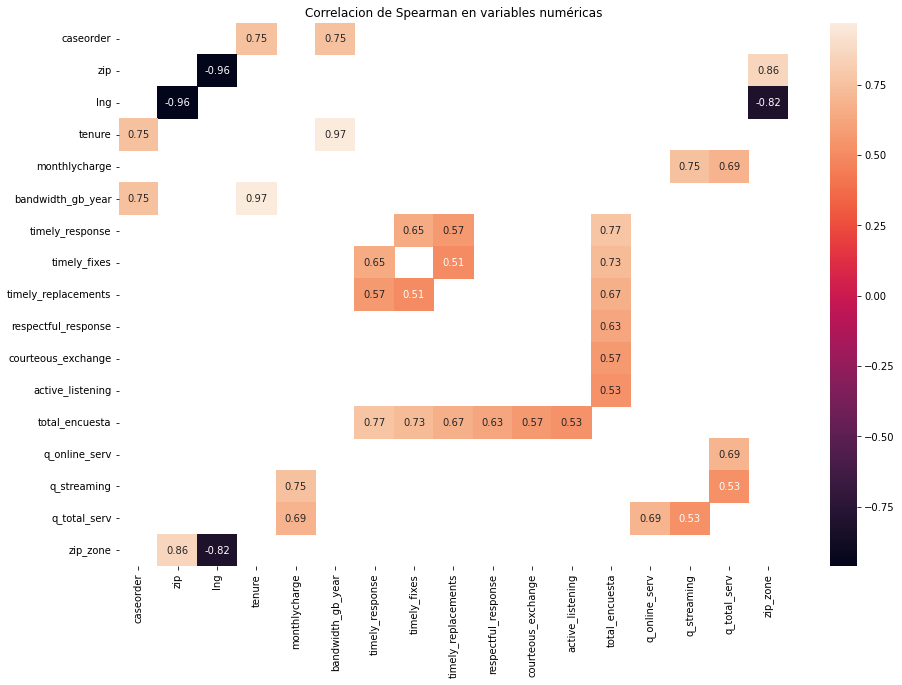

In [ ]:
fig, corr_plot = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(corr_table, annot=True,ax=corr_plot).set(title='Correlacion de Spearman en variables numéricas')

In [ ]:
corr_cols = corr_table.columns[2:]
corr_vars = corr_table.unstack().dropna().drop_duplicates().reset_index()

In [ ]:
#jointplot para las variables que tienen correlación mayor a 0.5
def plot_corr_table(index):
  var_x = corr_vars['level_0'][index]
  var_y = corr_vars['level_1'][index]
  sns.jointplot(x = var_x, y= var_y, data=df)
  return


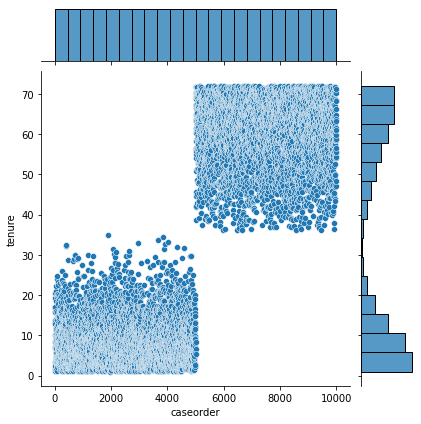

'Se han detectado un total de 19 correlaciones de valor absoluto 0.5 o mayor. Elegir el número de índice y se mostrará la correlación existente entre distintas variables '

Output()

Output()

In [ ]:
var_index = widgets.IntSlider(
              value=0,
              min=0,
              max=max(corr_vars.index),
              step=1,
              description='índice:',
              disabled=False,
              continuous_update=False,
              orientation='horizontal',
              readout=True,
              readout_format='d')

intro = 'Se han detectado un total de {} correlaciones de valor absoluto 0.5 o mayor. Elegir el número de índice y se mostrará la correlación existente entre distintas variables '.format(len(corr_vars.index))
def texto_variables(index_value):
  variables = 'La variable {} y {} tienen una correlación de {}'.format(corr_vars['level_0'][index_value], corr_vars['level_1'][index_value],round(corr_vars[0][index_value],2))
  print(variables)
  print()
  return

ui = widgets.HBox([var_index])

out_1 = widgets.interactive_output(texto_variables, {'index_value':var_index})
out_2 = widgets.interactive_output(plot_corr_table, {'index':var_index})

display(intro,ui,out_1,out_2)

#####**Observaciones:**

En términos generales no hay correlaciones significativas entre variables numéricas. Muchas de las encontradas se deben a que algunas variables se armaron custom a partir de otras variables. ej: valores de encuenstas y valor total de la encuesta.

* zip y lng, la correlación puede estar asociada a cómo se determinan los zip codes en eeuu.

* bandwidth y tenure tienen una correlación fuerte, a qué se puede deber? Hay un límite de bandwith mensual tope? Podemos analizarlo en el multivariado, porque es lo que usan para los servicios.

* Correlación positiva entre cantidad de OTROS servicios y costo, 0.69. También dependera de qué servicios se contraten, pero si podemos observar que a mayor cantidad de OTROS servicios el gasto mínimo es mayor. 

* Mismo caso que arriba con q_total_servicies y monthly charge, `Hay 9 personas que figuran con 0 servicios`

* Hay varias correlaciones entre los valores que le asigna la gente a diferentes aspectos de la encuenta (ver índices 4 al 7) y entre los diferentes valores de la encuesta y total encuesta, lo que es natural ya que este último es un agregado de esos valores.

* La variable q_total_serv se correlaciona con la cantidad de otros servicios y de online services porque deriba de ellas.

* La variable q_streaming tiene una correlacion del 75% con monthly_charge esto indica que es significativo el costo de estos servicios por sobre el costo de los otros servicios ofrecidos por la empresa.

#### Variables categóricas vs Numéricas

In [ ]:
#Tomo de arriba la lista cat_cols_graph que tenía las variables categóricas con menos de 15 categorias

cat_cols_graph

#Variables numéricas df.select_dtypes(include='number').columns

num_cols_graph = df.select_dtypes(include='number').columns

In [ ]:
var_cat = widgets.Dropdown(options=cat_cols_graph,
                      value = 'area',
                      description = 'Cat Col Name')

no_cat_col = list(df.select_dtypes(include='number').columns)

var_num = widgets.Dropdown(options=num_cols_graph,
                      value = 'monthlycharge',
                      description = 'Num Col Name')

ui_1 = widgets.HBox([var_num])
ui_2 = widgets.HBox([var_cat])

out = widgets.interactive_output(graph_cat_num, {'var_cat': var_cat,'var_num': var_num})

display(ui_1,ui_2,out)


##### **Observaciones**

TENURE
* Tenure y contract: Month to month y one year tienen una mediana parecida, alrededor de 30.

* Tenure y port_modem: Los que no tienen modem tienen una mediana menor de tenure

* Tenure internet service: Quienes no tienen internet service tienen una mediana menor

* Tenure y multiple: Quienes tienen multiples lineas tienen una mediana menor

* Tenure con online backup y device protection: Tienen una menor mediana quienes no tienen este servicio, sera pq es un servicio difícil de cambiar?

* Tenure y payment method: quienes pagan con transferencia bancaria tienen una mediana más chica.

* Tenure y contactos: quienes se contactaron 7 veces tienen mayor tenure.

* Quienes tienen online backup tienen mayor tenure.

* Quienes contratan 1 sv de streaming tienen una tenure mayor que quienes contratan 2 servicios o niguno.

* Quienes contratan streaming movies tienen una tenure menor que quienes no contratan este servicio.

* Quienes contratan streming tv tienen una tenure mayor que quienes no contratan.


BANDWIDTH

* vs employment: Su mediana varia de acuerdo con el tipo de trabajo.

* vs gender: Varia un poco la mediana según género.

* Contrato de dos años tiene una mayor mediana.

* Internet service: DSL utiliza más

* Servicio de streaming: Quienes contratan tienen mayor mediana, lo cual es esperado porque son servicios relacionados a videos- 

* payment method: quienes pagan con transferencia bancaria tienen una mediana más chica.


MONTHLY CHARGE

* vs contract: la mediana en los 3 tipos de contrato es similar. Esto indica que el cliente no paga menos por tener un contrato anual o bianual. Cual sera la ventaja de tener una contrato de mayor duracion?

* vs internetservices: quienes contratan por fibra optica tiene una mediana de 10usd aprox superior de abono respecto a DSL y quienes no contratan internet. Comparando con los sv de streaming, este servicios tiene menos impacto en el abono mensual.

* vs phone: el hehco de tener una linea telefonica no modifica el abono mensual. La mediana es la misma. 

* vs multiplephone: la mediana de quienes tienen varias lineas si paga un abono mayor. Su mediana es de unos 170 usd mientras que quienes no tiene multiple pagan una mediana de 150usd.

* vs streaming tv y streaming movies: La mediana del abono es similar para quienes contratan streaming peliculas y streaming tv. La mediana en ambos casos es de 200usd mientras que quienes no contratan alguno de estos servicios tienen una mediana de 150usd.

* vs q_streaming: Quienes contratana los 2 sv de q_streaming tienen una mediana mensual de 240usd

#### Variables Categóricas vs Categóricas

In [ ]:
var_hue = widgets.Dropdown(options=cat_cols_graph,
                      value = 'marital',
                      description = 'Cat Hue')

var_x = widgets.Dropdown(options=cat_cols_graph,
                      value = 'area',
                      description = 'Cat X axis')

ui_1 = widgets.HBox([var_x])
ui_2 = widgets.HBox([var_hue])

out = widgets.interactive_output(graph_cat_cat, {'var_x': var_x ,'var_hue': var_hue})

display(ui_1,ui_2, out)

### Análisis Multivariado

#### Funciones

In [ ]:
#funcion para variables numerica con categórica grid por tipo de servicio
def graph_cat_num_services(var_cat,var_num):
  fig, ax = plt.subplots(2,3,figsize=(30,15))

  p_1=sns.violinplot(data=df,x='q_online_serv',y=var_num,hue=var_cat,ax=ax[0,0])
  
  p_2=sns.violinplot(data=df,x='q_phone_serv',y=var_num,hue=var_cat,ax=ax[0,1])

  p_3=sns.violinplot(data=df,x='q_streaming',y=var_num,hue=var_cat,ax=ax[0,2])

  p_4=sns.boxplot(data=df,x='q_online_serv',y=var_num,hue=var_cat,ax=ax[1,0])

  p_5=sns.boxplot(data=df,x='q_phone_serv',y=var_num,hue=var_cat,ax=ax[1,1])

  p_6=sns.boxplot(data=df,x='q_streaming',y=var_num,hue=var_cat,ax=ax[1,2])

  #p_7=sns.kdeplot(data=df,x=var_num,hue='q_online_serv',color='blue' ,ax=ax[2,0])

  #p_8=sns.kdeplot(data=df,x=var_num,hue='q_phone_serv', color='blue' ,ax=ax[2,1])

  #p_9=sns.kdeplot(data=df,x=var_num,hue='q_streaming',color='blue' ,ax=ax[2,2])
  return

In [ ]:
def facet_graph(var_1,var_2,var_col):
  g = sns.FacetGrid(df, col=var_col,height=5,hue=var_2,palette='colorblind')
  g.map_dataframe(sns.countplot,x=var_1);
  return

#### Comportamiento de variables según tipo de productos

In [ ]:
var_cat = widgets.Dropdown(options=list(df.select_dtypes(include='O').columns),
                      value = 'churn',
                      description = 'Cat Col Name')

no_cat_col = list(df.select_dtypes(include='number').columns)

var_num = widgets.Dropdown(options=no_cat_col,
                      value = 'tenure',
                      description = 'Num Col Name')

ui_1 = widgets.HBox([var_num])
ui_2 = widgets.HBox([var_cat])

out = widgets.interactive_output(graph_cat_num_services, {'var_cat': var_cat,'var_num': var_num})

display(ui_1,ui_2, out)

#####Observaciones:

TENURE

* Quienes no contratan servicios streaming y pasan los 30 meses no tienen churn. A medida que aumenta la cantidad de servicios streaming contratados, se incrementa la cantidad de personas por encima de 30 meses de antiguedad que abandonan.
* A medida que aumenta la cantidad de servicios streaming contratados disminuye la cantidad de personas con pocos meses de contratación que deciden quedarse.

BANDWITH

* Comportamiento similar a la tenure

CHARGE

* Cuando vemos la info a nivel de online o phone services quienes abandonan tienen mayores medianas y los rangos intercuartílicos se ubican en valores más altos. Puede ser que estas personas también contrataron servicios streaming?

* En servicios streaming se observa una clara correlación positiva con el costo mensual.

#### Variables categóricas 

In [ ]:
var_col = widgets.Dropdown(options=list(df.select_dtypes(include='O').columns),
                      value = 'techie',
                      description = 'Var Col')

var_1 = widgets.Dropdown(options=list(df.select_dtypes(include='O').columns),
                      value = 'q_streaming_cat',
                      description = 'var_1 Name')

var_2 = widgets.Dropdown(options=list(df.select_dtypes(include='O').columns),
                      value = 'churn',
                      description = 'var_2 Name')

ui_1 = widgets.HBox([var_1])
ui_2 = widgets.HBox([var_2])
ui_3 = widgets.HBox([var_col])

out = widgets.interactive_output(facet_graph, {'var_1': var_1,'var_2': var_2,'var_col': var_col})

display(ui_1,ui_2,ui_3, out)

In [ ]:
  fig, ax = plt.subplots(2,2,figsize=(20,15))

  p_1=sns.violinplot(data=df,x='techie',y='bandwidth_gb_year',hue='churn',ax=ax[0,0])
  
  p_2=sns.violinplot(data=df,x='techie',y='outage_sec_perweek',hue='churn',ax=ax[0,1])

  p_4=sns.boxplot(data=df,x='techie',y='bandwidth_gb_year',hue='churn',ax=ax[1,0])

  p_5=sns.boxplot(data=df,x='techie',y='outage_sec_perweek',hue='churn',ax=ax[1,1])

##### Observaciones 1

* Quienes son techies tienen mayor proporción de abandono cuando contratan 1 servicio de streaming. 

* Los techies que contratan 3 online services abandonan casi todos.

* Tanto los techies como los no techies abandonan cuando tienen 2 servicios phone-

In [ ]:
  fig, ax = plt.subplots(1,2,figsize=(30,10))

  p_1=sns.violinplot(data=df,x='contract',y='tenure',hue='churn',ax=ax[0])


  p_4=sns.boxplot(data=df,x='contract',y='monthlycharge',hue='churn',ax=ax[1])

In [ ]:
  g = sns.FacetGrid(df, col='contract',height=5)#,hue='q_streaming',palette='colorblind')
  g.map_dataframe(sns.boxplot,hue='q_total_serv',y='tenure',x='churn');
  g.add_legend();

In [ ]:
  g = sns.FacetGrid(df, col='contract',height=5)#,hue=var_2,palette='colorblind')
  g.map_dataframe(sns.boxplot,hue='q_online_serv',y='tenure',x='churn');
  g.add_legend();

In [ ]:
  g = sns.FacetGrid(df, col='contract',height=5)#,hue=var_2,palette='colorblind')
  g.map_dataframe(sns.boxplot,hue='q_phone_serv',y='tenure',x='churn');
  g.add_legend();

In [ ]:
  g = sns.FacetGrid(df, col='contract',height=5)#,hue=var_2,palette='colorblind')
  g.map_dataframe(sns.violinplot,hue='streamingmovies',y='tenure',x='churn');
  g.add_legend();

##### Observaciones 2

En el análisis bivariado vimos que la mayoria de los contratos son month to month (56%) y tienen tenure baja y churn alta.

* Observamos que los clientes con contrato mensual que se quedaron tiene una mediana de antiguedad en la empresa mayor. Tanto para churn como no churn la mediana de antiguedad de los contratos mensuales es mayor a los otros dos tipos de contrato.

Sin embargo, al hacer una división por tipo de servicio, podemos ver que los month to month:

* Quienes tienen contrato mensual y se quedan tienen una tenure baja en general, salvo quienes contratan más servicios (la mayoria de los clientes contratan 5, 3 ó 4 servicios, aumentando el tenure acumulado cuando lo vemos sin la división por cantidad de productos).

* En general abandonan en tenures altos. 

Los que tienen contratos de uno o dos años abandonan en tenures bajos, en todos los servicios. Pero en el agregado de cantidad de servicios, quienes contrataron más servicios tienen una mayor mediana que los demás.